In [4]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/home/samir/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
config.json: 100%|██████████| 4.19k/4.19k [00:00<00:00, 5.90MB/s]
pytorch_model.bin: 100%|██████████| 605M/605M [01:18<00:00, 7.74MB/s] 
tokenizer_config.json: 100%|██████████| 568/568 [00:00<00:00, 2.26MB/s]
vocab.json: 100%|██████████| 862k/862k [00:01<00:00, 683kB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 732kB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:01<00:00, 1.70MB/s]
special_tokens_map.json: 100%|██████████| 389/389 [00:00<00:00, 986kB/s]


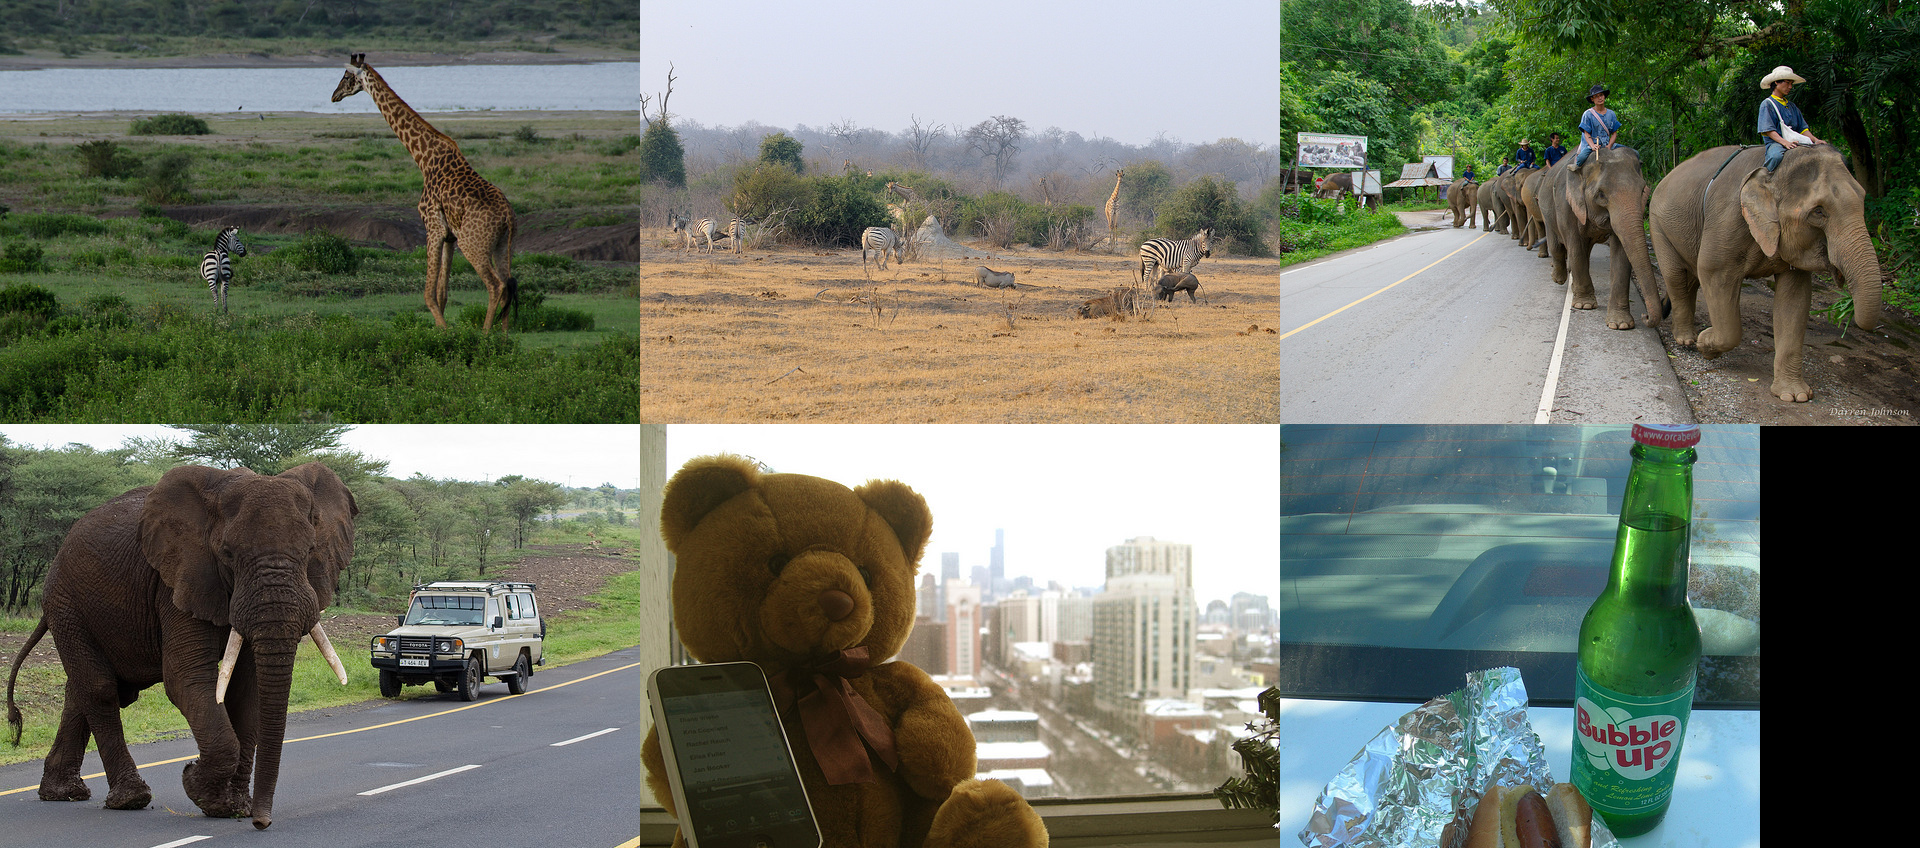

In [7]:
import requests
from PIL import Image

def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_urls = [
    'http://images.cocodataset.org/val2014/COCO_val2014_000000159977.jpg', 
    'http://images.cocodataset.org/val2014/COCO_val2014_000000311295.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000457834.jpg', 
    'http://images.cocodataset.org/val2014/COCO_val2014_000000555472.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000174070.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000460929.jpg'
    ]
images = []
for url in image_urls:
    images.append(Image.open(requests.get(url, stream=True).raw))

grid = image_grid(images, cols=3)
display(grid)

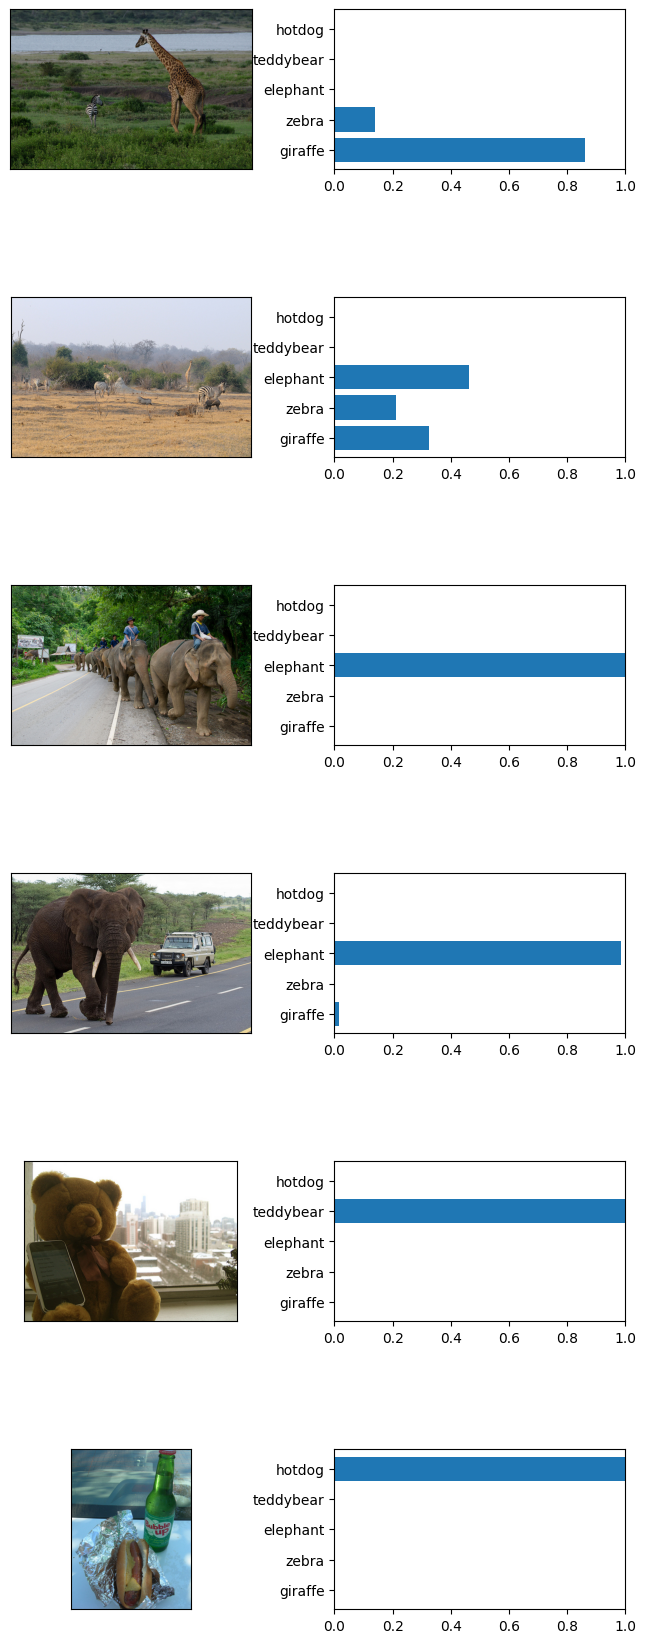

In [11]:
# %% Zero-shot classification
classes = ['giraffe', 'zebra', 'elephant', 'teddybear', 'hotdog']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# %% Display classification results

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()